<a href="https://colab.research.google.com/github/jongjong2323/colab01/blob/main/4_3_293p_~322p_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

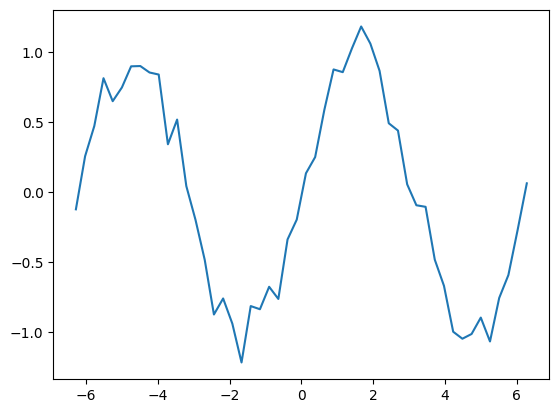

(40, 10, 1)
(40, 10, 1)


In [4]:
import numpy as np
import matplotlib.pyplot as plt
x_data=np.linspace(-2*np.pi,2*np.pi) #-2π에서 2π까지
sin_data=np.sin(x_data) +0.1*np.random.randn(len(x_data)) #sin()함수에 난수로 노이즈를 더한다
plt.plot(x_data,sin_data)
plt.show()
n_rnn=10 #시계열의 수
n_sample=len(x_data)-n_rnn #샘플 수
x=np.zeros((n_sample,n_rnn))  #입력
t=np.zeros((n_sample,n_rnn))  #정답
for i in range(0,n_sample):
  x[i]=sin_data[i:i+n_rnn]
  t[i]=sin_data[i+1:i+n_rnn+1] #시계열을 입력보다도 1개 뒤로 비켜놓는다
x=x.reshape(n_sample,n_rnn,1) #Keras에서의 RNN에서는 입력을 (샘플 수, 시계열의 수,입력층의 뉴런 수)로 한다
print(x.shape)
t=t.reshape(n_sample,n_rnn,1) #이번은 입력과 같은 형태
print(t.shape)
#훈련 데이터의 작성

In [ ]:
SimpleRNN(뉴런 수,return_sequences=시계열을 전부 반환할지 여부)
#[SimpleRNN() 함수의 설정]

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
n_in=1 #입력층의 뉴런 수
n_mid=20 #중간층의 뉴런 수
n_out=1 #출력층의 뉴런 수
model=Sequential()
model.add(SimpleRNN(n_mid,input_shape=(n_rnn,n_in),return_sequences=True)) #간단한 RNN층
model.add(Dense(n_out,activation="linear"))  #전결합층
model.compile(loss='mean_squared_error',optimizer='sgd') #오차는 제곱오차, 최적화 알고리즘은 SGD
print(model.summary())
#간단한 RNN모델을 구축한다

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 10, 20)            440       
                                                                 
 dense (Dense)               (None, 10, 1)             21        
                                                                 
Total params: 461
Trainable params: 461
Non-trainable params: 0
_________________________________________________________________
None


In [7]:
history=model.fit(x,t,epochs=20,batch_size=8,validation_split=0.1)
#RNN 모델을 훈련한다

Epoch 1/20
5/5 [==============================] - 2s 87ms/step - loss: 0.2007 - val_loss: 0.1748
Epoch 2/20
5/5 [==============================] - 0s 11ms/step - loss: 0.1396 - val_loss: 0.1195
Epoch 3/20
5/5 [==============================] - 0s 18ms/step - loss: 0.1126 - val_loss: 0.0937
Epoch 4/20
5/5 [==============================] - 0s 11ms/step - loss: 0.0979 - val_loss: 0.0770
Epoch 5/20
5/5 [==============================] - 0s 11ms/step - loss: 0.0886 - val_loss: 0.0744
Epoch 6/20
5/5 [==============================] - 0s 11ms/step - loss: 0.0837 - val_loss: 0.0713
Epoch 7/20
5/5 [==============================] - 0s 11ms/step - loss: 0.0790 - val_loss: 0.0625
Epoch 8/20
5/5 [==============================] - 0s 11ms/step - loss: 0.0768 - val_loss: 0.0622
Epoch 9/20
5/5 [==============================] - 0s 12ms/step - loss: 0.0747 - val_loss: 0.0614
Epoch 10/20
5/5 [==============================] - 0s 11ms/step - loss: 0.0726 - val_loss: 0.0570
Epoch 11/20
5/5 [============

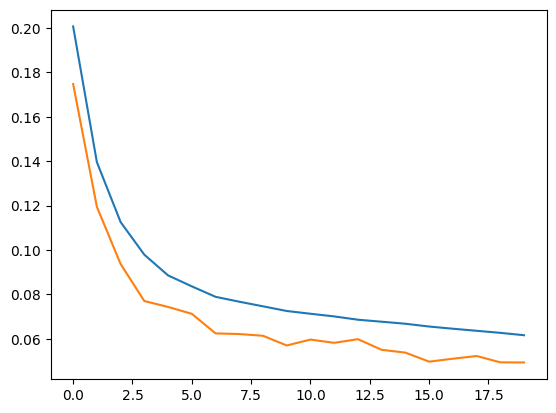

In [8]:
loss=history.history['loss']
vloss=history.history['val_loss']
plt.plot(np.arange(len(loss)),loss)
plt.plot(np.arange(len(vloss)),vloss)
plt.show()
#학습의 추이를 표시시

1/1 [==============================] - 0s 23ms/step


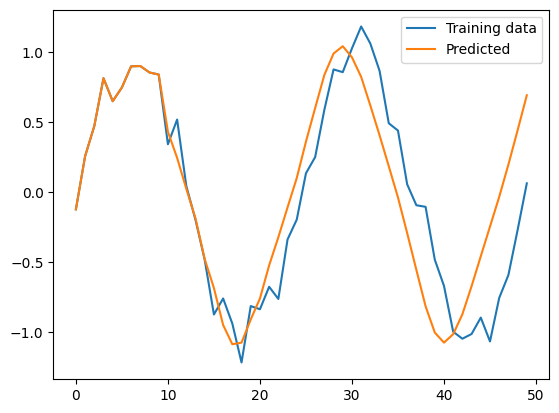

In [9]:
predicted=x[0].reshape(-1) #처음의 입력.reshape(-1)으로 1차원의 벡터로 한다
for i in range(0,n_sample):
  y=model.predict(predicted[-n_rnn:].reshape(1,n_rnn,1)) #최근 데이터를 사용해서 예측을 실시한다

  predicted=np.append(predicted,y[0][n_rnn-1][0]) #출력의 최후 결과를 predicted에 추가한다
plt.plot(np.arange(len(sin_data)),sin_data,label="Training data")  #훈련에 사용한 데이터
plt.plot(np.arange(len(predicted)),predicted,label='Predicted') #예측 결과
plt.legend()
plt.show()
#학습한 RNN 모델을 사용해서 예측한 결과

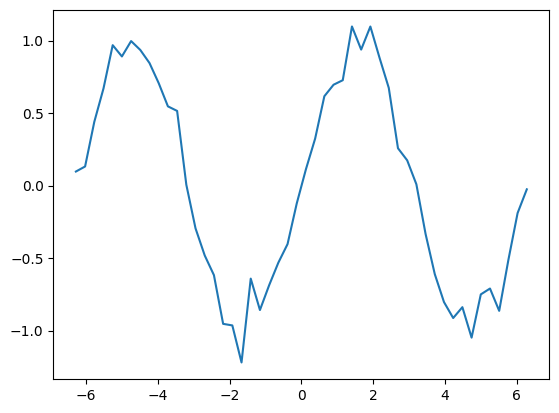

(40, 10, 1)
(40, 10, 1)


In [10]:
import numpy as np
import matplotlib.pyplot as plt
x_data=np.linspace(-2*np.pi,2*np.pi)  #-2π에서 2π까지
sin_data=np.sin(x_data)+0.1*np.random.randn(len(x_data)) #sin()함수에 난수로 노이즈를 더한다
plt.plot(x_data,sin_data)
plt.show()
n_rnn=10 #시계열의 수
n_sample=len(x_data)-n_rnn #샘플 수
x=np.zeros((n_sample,n_rnn)) #입력
t=np.zeros((n_sample,n_rnn)) #정답
for i in range(0,n_sample):
  x[i]=sin_data[i:i+n_rnn]
  t[i]=sin_data[i+1:i+n_rnn+1] #시계열을 입력보다도 1개를 뒤로 비켜놓는다
x=x.reshape(n_sample,n_rnn,1) #샘플 수,시계열의 수,입력층의 뉴런 수
print(x.shape)
t=t.reshape(n_sample,n_rnn,1) #이번은 입력과 같은 형태
print(t.shape)
#훈련용 데이터의 작성

In [11]:
LSTM(뉴런 수,return_sequences=시계열을 모두 반환할지 여부)
#[LSTM층의 설정]

SyntaxError: ignored

In [12]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense,SimpleRNN,LSTM
n_in=1 #입력층의 뉴런 수
n_mid=20 #중간층의 뉴런 수
n_out=1 #출력층의 뉴런 수
#비교를 위한 통상의 RNN
model_rnn=Sequential()
model_rnn.add(SimpleRNN(n_mid,input_shape=(n_rnn,n_in),return_sequences=True))
model_rnn.add(Dense(n_out,activation='linear'))
model_rnn.compile(loss='mean_squared_error',optimizer='sgd')
print(model_rnn.summary())
#LSTM
model_lstm=Sequential()
model_lstm.add(LSTM(n_mid,input_shape=(n_rnn,n_in),return_sequences=True))
model_lstm.add(Dense(n_out,activation='linear'))
model_lstm.compile(loss="mean_squared_error",optimizer='sgd')
print(model_lstm.summary())
#RNN과 LSTM 구현현

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 10, 20)            440       
_________________________________________________________________
dense (Dense)                (None, 10, 1)             21        
Total params: 461
Trainable params: 461
Non-trainable params: 0
_________________________________________________________________
None
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 10, 20)            1760      
_________________________________________________________________
dense_1 (Dense)              (None, 10, 1)             21        
Total params: 1,781
Trainable params: 1,781
Non-trainable params: 0
_________________________________________________________________
None


In [13]:
import time
epochs=500
batch_size=8 #배치 크기
#일반적인 RNN
start_time=time.time()
history_rnn=model_rnn.fit(x,t,epochs=epochs,batch_size=batch_size,verbose=0)
print("학습시간 --일반적인 RNN--:",time.time()-start_time)
#LSTM
start_time=time.time()
history_lstm=model_lstm.fit(x,t,epochs=epochs,batch_size=batch_size,verbose=0)
print("학습 시간 --LSTM--:",time.time()-start_time)
#모델의 학습

학습시간 --일반적인 RNN--: 6.903323411941528
학습 시간 --LSTM--: 18.27002215385437


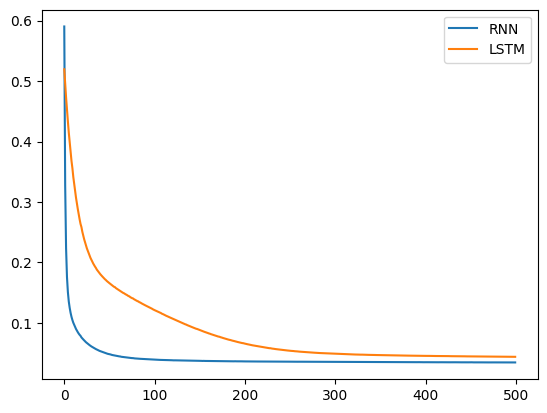

In [14]:
loss_rnn=history_rnn.history['loss']
loss_lstm=history_lstm.history['loss']
plt.plot(np.arange(len(loss_rnn)),loss_rnn,label="RNN")
plt.plot(np.arange(len(loss_lstm)),loss_lstm,label='LSTM')
plt.legend()
plt.show()
#학습의 추이를 표시

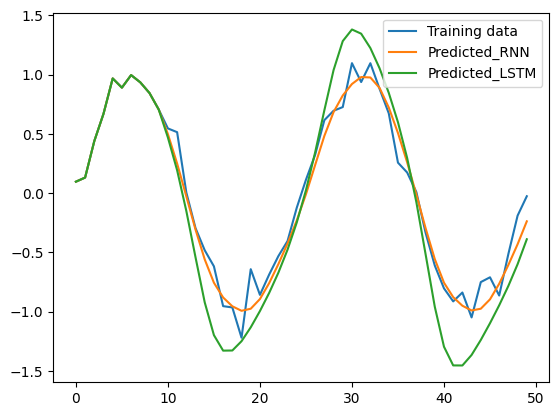

In [15]:
predicted_rnn=x[0].reshape(-1)
predicted_lstm=x[0].reshape(-1)
for i in range(0,n_sample):
  y_rnn=model_rnn.predict(predicted_rnn[-n_rnn:].reshape(1,n_rnn,1))
  predicted_rnn=np.append(predicted_rnn,y_rnn[0][n_rnn-1][0])
  y_lstm=model_lstm.predict(predicted_lstm[-n_rnn:].reshape(1,n_rnn,1))
  predicted_lstm=np.append(predicted_lstm,y_lstm[0][n_rnn-1][0])
plt.plot(np.arange(len(sin_data)),sin_data,label='Training data')
plt.plot(np.arange(len(predicted_rnn)),predicted_rnn,label='Predicted_RNN')
plt.plot(np.arange(len(predicted_lstm)),predicted_lstm,label='Predicted_LSTM')
plt.legend()
plt.show()
#학습한 모델을 사용한 예측

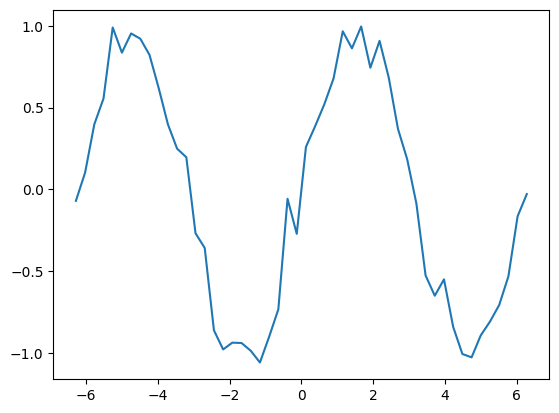

(40, 10, 1)
(40, 10, 1)


In [16]:
import numpy as np
import matplotlib.pyplot as plt
x_data=np.linspace(-2*np.pi,2*np.pi)  #-2π에서 2π까지
sin_data=np.sin(x_data)+0.1*np.random.randn(len(x_data)) #sin()함수에 난수로 노이즈를 더한다
plt.plot(x_data,sin_data)
plt.show()
n_rnn=10 #시계열의 수
n_sample=len(x_data)-n_rnn #샘플 수
x=np.zeros((n_sample,n_rnn)) #입력
t=np.zeros((n_sample,n_rnn)) #정답
for i in range(0,n_sample):
  x[i]=sin_data[i:i+n_rnn]
  t[i]=sin_data[i+1:i+n_rnn+1]  #시계열을 입력보다도 1개 뒤로 비켜놓는다
x=x.reshape(n_sample,n_rnn,1) #샘플 수, 시계열의 수, 입력층의 뉴런 수
print(x.shape)
t=t.reshape(n_sample,n_rnn,1) #이번은 입력과 같은 형태
print(t.shape)
#훈련용 데이터의 작성

In [ ]:
GRU(뉴런 수,return_sequences=시계열을 전부 반환할지 여부)
#[GRU층의 설정]

In [17]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense,LSTM,GRU
n_in=1 #입력층의 뉴런 수
n_mid=20 #중간층의 뉴런 수
n_out=1 #출력층의 뉴런 수
#비교를 위한 LSTM
model_lstm=Sequential()
model_lstm.add(LSTM(n_mid,input_shape=(n_rnn,n_in),return_sequences=True))
model_lstm.add(Dense(n_out,activation="linear"))
model_lstm.compile(loss="mean_squared_error",optimizer='sgd')
print(model_lstm.summary())
#GRU
model_gru=Sequential()
model_gru.add(GRU(n_mid,input_shape=(n_rnn,n_in),return_sequences=True))
model_gru.add(Dense(n_out,activation='linear'))
model_gru.compile(loss='mean_squared_error',optimizer='sgd')
print(model_gru.summary())
#LSTM과 GRU의 비교

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 10, 20)            1760      
_________________________________________________________________
dense_2 (Dense)              (None, 10, 1)             21        
Total params: 1,781
Trainable params: 1,781
Non-trainable params: 0
_________________________________________________________________
None
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 10, 20)            1320      
_________________________________________________________________
dense_3 (Dense)              (None, 10, 1)             21        
Total params: 1,341
Trainable params: 1,341
Non-trainable params: 0
_________________________________________________________________
None


In [18]:
import time
epochs=500
batch_size=8 #배치 크기
#LSTM
start_time=time.time()
history_lstm=model_lstm.fit(x,t,epochs=epochs,batch_size=batch_size,verbose=0)
print("학습시간 --LSTM--:",time.time()-start_time)
#GRU
start_time=time.time()
history_gru=model_gru.fit(x,t,epochs=epochs,batch_size=batch_size,verbose=0)
print("학습 시간 --GRU--:",time.time()-start_time)
#모델의 학습

학습시간 --LSTM--: 21.271249055862427
학습 시간 --GRU--: 17.01974868774414


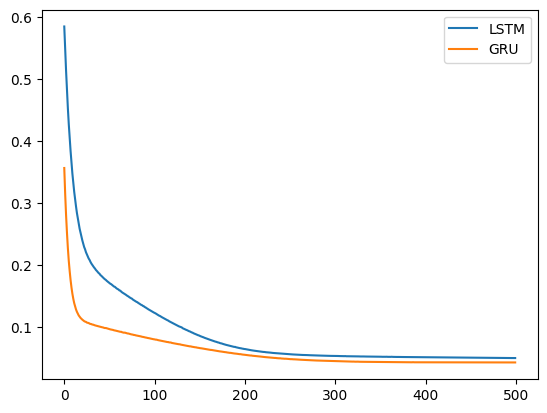

In [19]:
loss_lstm=history_lstm.history['loss']
loss_gru=history_gru.history['loss']
plt.plot(np.arange(len(loss_lstm)),loss_lstm,label='LSTM')
plt.plot(np.arange(len(loss_gru)),loss_gru,label='GRU')
plt.legend()
plt.show()
#학습의 추이를 표시


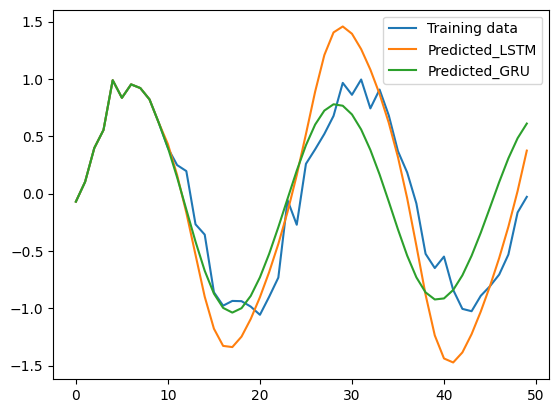

In [21]:
predicted_lstm=x[0].reshape(-1)
predicted_gru=x[0].reshape(-1)
for i in range(0,n_sample):
  y_lstm=model_lstm.predict(predicted_lstm[-n_rnn:].reshape(1,n_rnn,1))
  predicted_lstm=np.append(predicted_lstm,y_lstm[0][n_rnn-1][0])
  y_gru=model_gru.predict(predicted_gru[-n_rnn:].reshape(1,n_rnn,1))
  predicted_gru=np.append(predicted_gru,y_gru[0][n_rnn-1][0])
plt.plot(np.arange(len(sin_data)),sin_data,label='Training data')
plt.plot(np.arange(len(predicted_lstm)),predicted_lstm,label="Predicted_LSTM")
plt.plot(np.arange(len(predicted_gru)),predicted_gru,label='Predicted_GRU')
plt.legend()
plt.show()
#예측한 모델을 사용해서 예측